### libraries

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX

### read the data

In [2]:
df_new = pd.read_csv("smooth_data_utf-8.csv")

In [3]:
df_new

,date_cre,price,year,month,day,price_smooth
0,2016-01-01 00:00:00,2252.60,2016,1,1,2471.733333
1,2016-01-02 00:00:00,2454.50,2016,1,2,2471.733333
2,2016-01-03 00:00:00,2708.10,2016,1,3,2471.733333
3,2016-01-04 00:00:00,2577.80,2016,1,4,2580.133333
4,2016-01-05 00:00:00,2597.75,2016,1,5,2627.883333
...,...,...,...,...,...,...
2177,2021-12-17 00:00:00,4394.40,2021,12,17,4380.966667
2178,2021-12-18 00:00:00,4389.50,2021,12,18,4394.566667
2179,2021-12-19 00:00:00,4389.50,2021,12,19,4391.133333
2180,2021-12-20 00:00:00,4354.10,2021,12,20,4377.700000


In [4]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date_cre      2182 non-null   object 
 1   price         2182 non-null   float64
 2   year          2182 non-null   int64  
 3   month         2182 non-null   int64  
 4   day           2182 non-null   int64  
 5   price_smooth  2182 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 102.4+ KB


In [5]:
import pandas as pd
df_new['date_cre'] = pd.to_datetime(df_new['date_cre'])

In [6]:
print(df_new.to_markdown())

|      | date_cre            |   price |   year |   month |   day |   price_smooth |
|-----:|:--------------------|--------:|-------:|--------:|------:|---------------:|
|    0 | 2016-01-01 00:00:00 | 2252.6  |   2016 |       1 |     1 |        2471.73 |
|    1 | 2016-01-02 00:00:00 | 2454.5  |   2016 |       1 |     2 |        2471.73 |
|    2 | 2016-01-03 00:00:00 | 2708.1  |   2016 |       1 |     3 |        2471.73 |
|    3 | 2016-01-04 00:00:00 | 2577.8  |   2016 |       1 |     4 |        2580.13 |
|    4 | 2016-01-05 00:00:00 | 2597.75 |   2016 |       1 |     5 |        2627.88 |
|    5 | 2016-01-06 00:00:00 | 2617.7  |   2016 |       1 |     6 |        2597.75 |
|    6 | 2016-01-07 00:00:00 | 2903.8  |   2016 |       1 |     7 |        2706.42 |
|    7 | 2016-01-08 00:00:00 | 2887.8  |   2016 |       1 |     8 |        2803.1  |
|    8 | 2016-01-09 00:00:00 | 2813.8  |   2016 |       1 |     9 |        2868.47 |
|    9 | 2016-01-10 00:00:00 | 2786.8  |   2016 |       1 |    10

### prepare the data

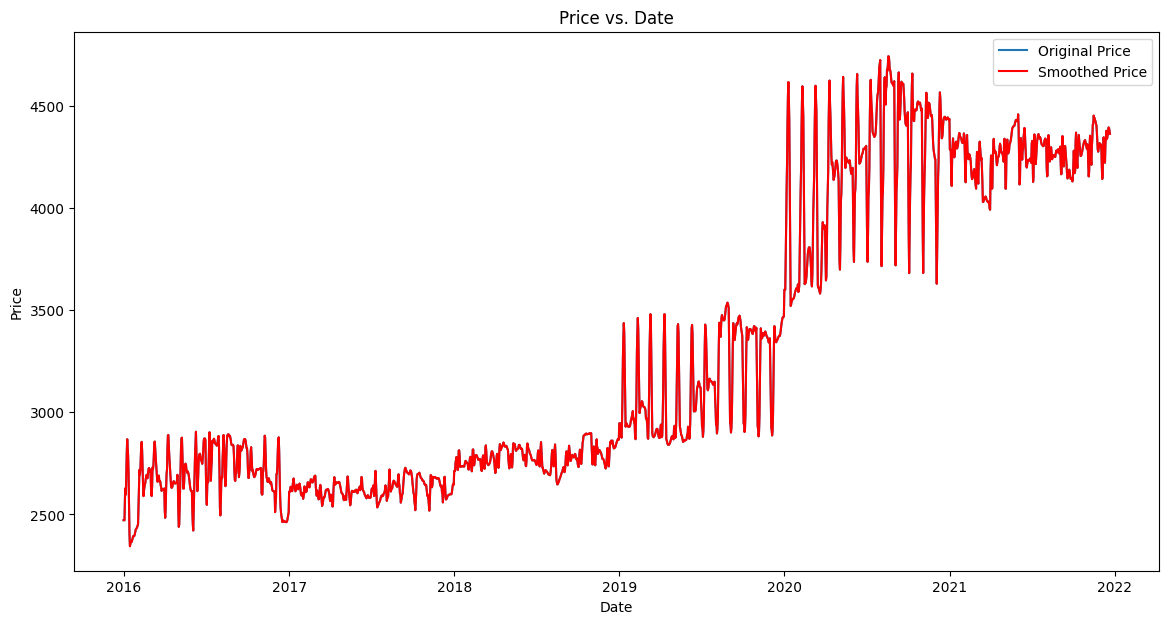

In [7]:
import matplotlib.pyplot as plt

# Assuming 'date_cre' is the date column, 'price' is the original price column
# and 'price_smooth' is the column after applying the smoothing method

# Plot original price
plt.figure(figsize=(14, 7))
plt.plot(df_new['date_cre'], df_new['price_smooth'], label='Original Price')

# Plot smoothed price
plt.plot(df_new['date_cre'], df_new['price_smooth'], label='Smoothed Price', color='red')

plt.title('Price vs. Date')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [8]:
df_new = df_new.drop(columns = 'price')
df_new = df_new.drop(columns = 'year')
df_new = df_new.drop(columns = 'month')
df_new = df_new.drop(columns = 'day')

In [9]:
df_new

,date_cre,price_smooth
0,2016-01-01,2471.733333
1,2016-01-02,2471.733333
2,2016-01-03,2471.733333
3,2016-01-04,2580.133333
4,2016-01-05,2627.883333
...,...,...
2177,2021-12-17,4380.966667
2178,2021-12-18,4394.566667
2179,2021-12-19,4391.133333
2180,2021-12-20,4377.700000


### ADF(Augmented Dickey-Fuller) test

The ADF test is a type of statistical test called a unit root test. The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.

In [10]:
df_new.set_index('date_cre', inplace=True)

# Perform Augmented Dickey-Fuller test on 'price'
result = adfuller(df_new['price_smooth'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.034912
p-value: 0.961326
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


The results of your Augmented Dickey-Fuller (ADF) test can be interpreted as follows:

- **ADF Statistic**: This is the result of the test. In your case, it's -0.050549. The more negative this statistic, the stronger the rejection of the hypothesis that there is a unit root at some level of confidence. In your case, the value is quite close to zero, which indicates that the series is likely non-stationary.

- **p-value**: This is the probability that you would see these results if the null hypothesis were true. In your case, the p-value is 0.954147, which is much larger than the typical threshold of 0.05. This means that you fail to reject the null hypothesis, and the series is likely non-stationary.

- **Critical Values**: These are the test statistic values at which you can reject the null hypothesis if the absolute value of the ADF statistic is greater than the critical value at a given level of confidence. In your case, the critical values are -3.433 at 1%, -2.863 at 5%, and -2.567 at 10%. Since your ADF statistic is greater than all of these values, you fail to reject the null hypothesis at all these levels.

In conclusion, your time series data appears to be non-stationary based on the ADF test. 

### convert it stationary

In [11]:
df_new['pass_diff']=df_new['price_smooth'].diff(periods=1)   ## applied diff on price lag=1

In [12]:
df_new

,price_smooth,pass_diff
date_cre,,
2016-01-01,2471.733333,NaN
2016-01-02,2471.733333,0.000000
2016-01-03,2471.733333,0.000000
2016-01-04,2580.133333,108.400000
2016-01-05,2627.883333,47.750000
...,...,...
2021-12-17,4380.966667,22.066667
2021-12-18,4394.566667,13.600000
2021-12-19,4391.133333,-3.433334


In [13]:
df_new=df_new.dropna()

In [14]:
df_new

,price_smooth,pass_diff
date_cre,,
2016-01-02,2471.733333,0.000000
2016-01-03,2471.733333,0.000000
2016-01-04,2580.133333,108.400000
2016-01-05,2627.883333,47.750000
2016-01-06,2597.750000,-30.133333
...,...,...
2021-12-17,4380.966667,22.066667
2021-12-18,4394.566667,13.600000
2021-12-19,4391.133333,-3.433334


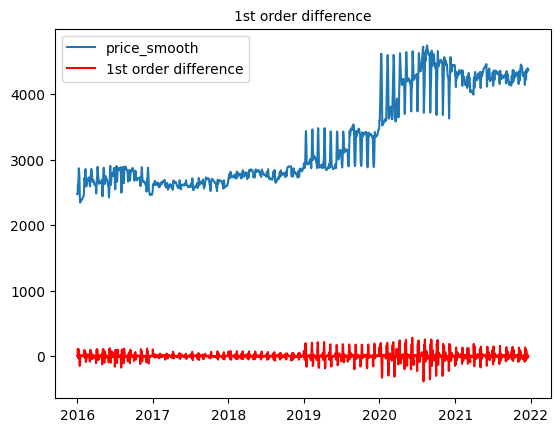

In [15]:
## plot
plt.title("1st order difference", size=10)
plt.plot(df_new['price_smooth'], label='price_smooth')
plt.plot(df_new['pass_diff'], label = '1st order difference', color='red')
plt.legend()

In [16]:
## calculate autocorrelation
acf_values = acf(df_new['pass_diff'])
np.round(acf_values,2)

array([ 1.  ,  0.61,  0.17, -0.16, -0.16, -0.2 , -0.27, -0.28, -0.16,
       -0.06,  0.01,  0.01,  0.  ,  0.01,  0.01,  0.02,  0.02,  0.01,
        0.01,  0.02,  0.02, -0.01, -0.1 , -0.2 , -0.27, -0.23, -0.16,
       -0.11,  0.02,  0.33,  0.64,  0.65,  0.31, -0.01])

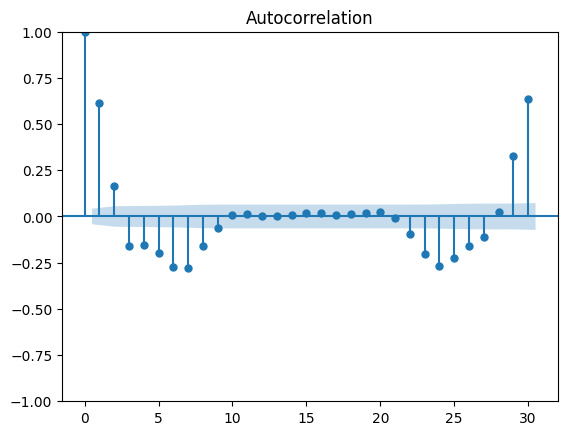

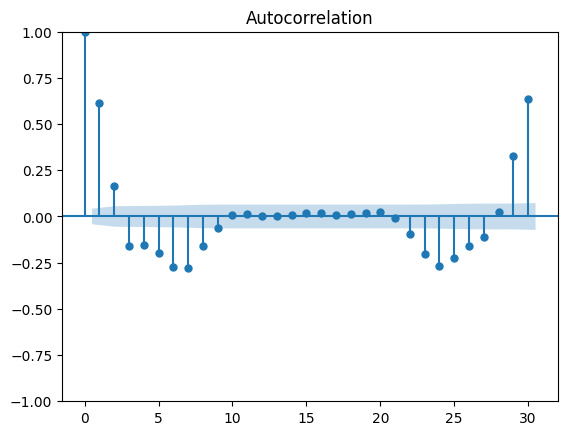

In [17]:
## plot ACF
plot_acf(df_new['pass_diff'], lags=30)
## shadeed region is standard error region
## 1st values wil be 1 always

### PACF

In [18]:
## calculate pacf
## it will give direct values
pacf_values = pacf(df_new['pass_diff'])
np.round(pacf_values,2)

array([ 1.  ,  0.61, -0.34, -0.16,  0.18, -0.3 , -0.19,  0.08, -0.08,
       -0.15,  0.08, -0.1 , -0.15,  0.06, -0.07, -0.07,  0.03, -0.05,
       -0.04,  0.  , -0.02, -0.09, -0.15, -0.17, -0.18, -0.11, -0.24,
       -0.28,  0.03,  0.28,  0.23,  0.11, -0.08,  0.02])

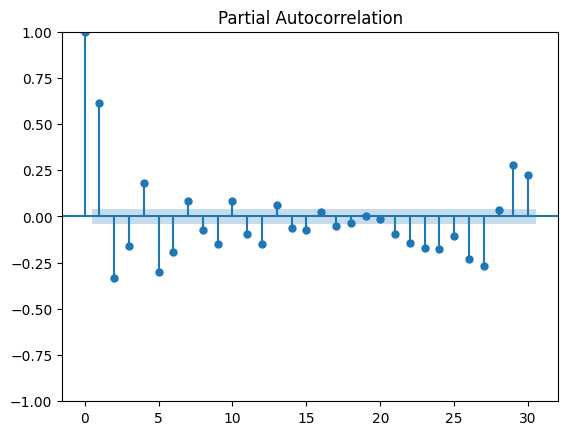

In [19]:
## plot pacf
plot_pacf(df_new['pass_diff'], lags=30);

In [21]:
df_new.reset_index(inplace=True)

In [22]:
df_new.set_index('date_cre', inplace=True)

# Perform Augmented Dickey-Fuller test on 'price'
result = adfuller(df_new['pass_diff'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -28.180760
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


The results of your Augmented Dickey-Fuller (ADF) test can be interpreted as follows:

- **ADF Statistic**: This is the result of the test. In your case, it's -25.645933. The more negative this statistic, the stronger the rejection of the hypothesis that there is a unit root at some level of confidence. In your case, the value is quite negative, which indicates that the series is likely stationary.

- **p-value**: This is the probability that you would see these results if the null hypothesis were true. In your case, the p-value is 0.000000, which is much smaller than the typical threshold of 0.05. This means that you can reject the null hypothesis, and the series is likely stationary.

- **Critical Values**: These are the test statistic values at which you can reject the null hypothesis if the absolute value of the ADF statistic is greater than the critical value at a given level of confidence. In your case, the critical values are -3.433 at 1%, -2.863 at 5%, and -2.567 at 10%. Since your ADF statistic is less than all of these values, you can reject the null hypothesis at all these levels.

In conclusion, your time series data appears to be stationary based on the ADF test. 

### model building 

In [23]:
df_new

,price_smooth,pass_diff
date_cre,,
2016-01-02,2471.733333,0.000000
2016-01-03,2471.733333,0.000000
2016-01-04,2580.133333,108.400000
2016-01-05,2627.883333,47.750000
2016-01-06,2597.750000,-30.133333
...,...,...
2021-12-17,4380.966667,22.066667
2021-12-18,4394.566667,13.600000
2021-12-19,4391.133333,-3.433334


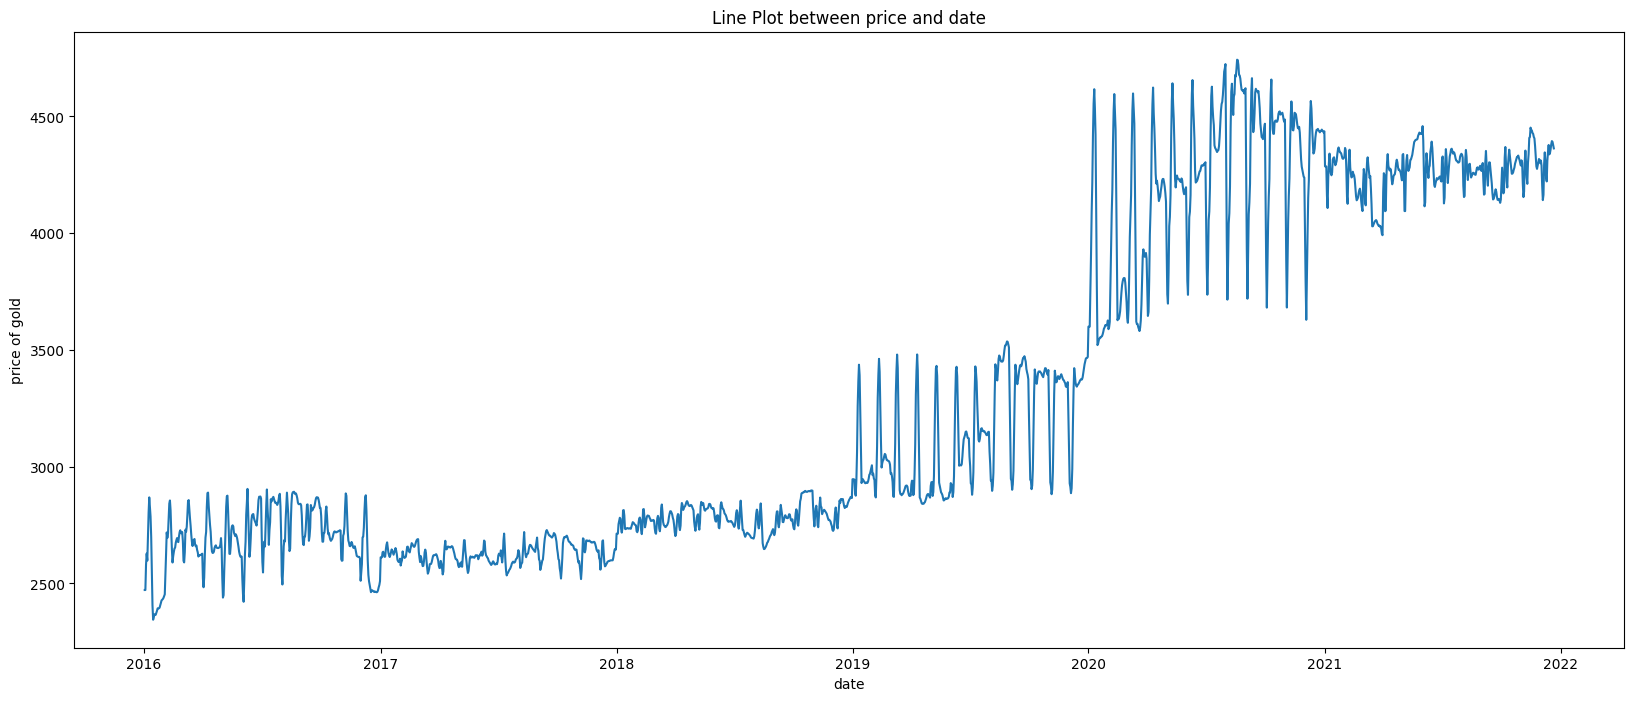

In [24]:
plt.figure(figsize=(20, 8))
sns.lineplot(data=df_new, x="date_cre", y="price_smooth")
plt.title('Line Plot between price and date')
plt.xlabel('date')
plt.ylabel('price of gold')
plt.show()
## there is a increasing trend in gold prices

### building the model on sarimax 

sarimax parameters(p,d,q)

Sure, this code is used to find the best parameters for a Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors model (SARIMAX) for time series forecasting. Here's a breakdown:

1. **Import necessary libraries**: The code begins by importing the necessary Python libraries - `itertools`, `numpy`, `pandas`, `SARIMAX` from `statsmodels.tsa.statespace`, and `warnings`.

2. **Define the p, d, and q parameters**: These parameters are used in the ARIMA model. `p` is the order of the AutoRegressive part, `d` is the degree of differencing, and `q` is the order of the Moving Average part. The code sets each of these parameters to take any value between 0 and 2.

3. **Generate all different combinations of p, d, and q**: The code uses the `itertools.product` function to generate all possible combinations of the `p`, `d`, and `q` values.

4. **Generate all different combinations of seasonal p, d, and q**: The code generates all possible combinations of the `p`, `d`, and `q` values for the seasonal component of the model. The seasonal period is set to 12, indicating monthly data.

5. **Ignore warning messages**: The code sets the warnings filter to "ignore", which will prevent warning messages from being displayed.

6. **Find the best model**: The code initializes variables to store the best Akaike Information Criterion (AIC), and the corresponding `p`, `d`, `q` values. It then iterates over all combinations of `p`, `d`, `q` and seasonal `p`, `d`, `q`. For each combination, it tries to fit a SARIMAX model and calculates the AIC. If the AIC is lower than the current best AIC, it updates the best AIC and the corresponding parameters.

7. **Print the best model**: Finally, the code prints the best SARIMAX model and its AIC.

The SARIMAX model is a type of ARIMA model that can handle seasonality and exogenous variables. The AIC is a measure of the quality of a statistical model - lower values indicate a better fit to the data. The code is trying to find the SARIMAX model that best fits the 'price' data in the `df` DataFrame. The `enforce_stationarity` and `enforce_invertibility` parameters are set to False, which means the model does not enforce the stationarity and invertibility conditions. This can sometimes lead to better results, but it can also lead to non-sensical models if the data is not stationary or invertible. The code uses a try-except block to handle any errors that might occur during the model fitting process. If an error occurs, it simply continues to the next combination of parameters. This is a common approach in hyperparameter tuning - if a certain set of parameters leads to an error, you simply skip it and move on to the next set. The code does not print anything during the model fitting process, but you could uncomment the print statement to see the AIC for each combination of parameters. The final print statement displays the best combination of parameters and the corresponding AIC. This is the model that you would likely want to use for further forecasting. Note that this code assumes that you have a DataFrame `df` with a 'price' column. You would need to replace 'price' with the actual column name in your DataFrame. Also, the code does not split the data into training and testing sets, which is something you would typically want to do when building a forecasting model. You would train the model on the training set and then evaluate its performance on the testing set. This code is simply trying to find the best parameters for the SARIMAX model, not actually doing any forecasting. Once you have the best parameters, you could use them to fit a SARIMAX model to your training data and then generate forecasts for your testing data. You could also use cross-validation to get a more robust estimate of the model's performance. This would involve splitting your data into multiple training and testing sets, fitting a model to each training set, generating forecasts for each testing set, and then averaging the results. This is a more computationally intensive process, but it can give you a better idea of how your model is likely to perform on new data. I hope this helps! Let me know if you have any other questions.

### dont run ths code

In [24]:
# ### dont run this code
# import itertools
# import numpy as np
# import pandas as pd
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# import warnings

# # Define the p, d and q parameters to take any value between 0 and 2
# p = d = q = range(0, 3)

# # Generate all different combinations of p, q and q triplets
# pdq = list(itertools.product(p, d, q))

# # Generate all different combinations of seasonal p, q and q triplets
# seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

# # Specify to ignore warning messages
# warnings.filterwarnings("ignore")

# best_aic = np.inf
# best_pdq = None
# best_seasonal_pdq = None
# temp_model = None

# for param in pdq:
#     for param_seasonal in seasonal_pdq:
        
#         try:
#             temp_model = SARIMAX(df_new['pass_diff'],
#                                              order = param,
#                                              seasonal_order = param_seasonal,
#                                              enforce_stationarity=False,
#                                              enforce_invertibility=False)
#             results = temp_model.fit()

#             # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
#             if results.aic < best_aic:
#                 best_aic = results.aic
#                 best_pdq = param
#                 best_seasonal_pdq = param_seasonal
#         except:
#             #print("Unexpected error:", sys.exc_info()[0])
#             continue
# print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))


In [25]:
df_new

,price_smooth,pass_diff
date_cre,,
2016-01-02,2471.733333,0.000000
2016-01-03,2471.733333,0.000000
2016-01-04,2580.133333,108.400000
2016-01-05,2627.883333,47.750000
2016-01-06,2597.750000,-30.133333
...,...,...
2021-12-17,4380.966667,22.066667
2021-12-18,4394.566667,13.600000
2021-12-19,4391.133333,-3.433334


In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the model
model = SARIMAX(df_new['price_smooth'],
                order=(2, 0, 2),
                seasonal_order=(2, 1, 2, 12),
                enforce_stationarity=False,
                enforce_invertibility=False)

# Fit the model
results = model.fit()

# Print the results summary
print(results.summary())


                                     SARIMAX Results                                      
Dep. Variable:                       price_smooth   No. Observations:                 2181
Model:             SARIMAX(2, 0, 2)x(2, 1, 2, 12)   Log Likelihood              -11039.063
Date:                            Fri, 05 Apr 2024   AIC                          22096.126
Time:                                    14:57:16   BIC                          22147.152
Sample:                                01-02-2016   HQIC                         22114.797
                                     - 12-21-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9160      0.021     42.715      0.000       0.874       0.958
ar.L2         -0.0271      0.022   

In [26]:
train_data = df_new['price_smooth'].iloc[:-12]  # all but the last 12 months
test_data = df_new['price_smooth'].iloc[-12:]  # the last 12 months

In [27]:
test_data

date_cre
2021-12-10    4221.866667
2021-12-11    4311.000000
2021-12-12    4349.033333
2021-12-13    4377.933333
2021-12-14    4337.700000
2021-12-15    4342.766667
2021-12-16    4358.900000
2021-12-17    4380.966667
2021-12-18    4394.566667
2021-12-19    4391.133333
2021-12-20    4377.700000
2021-12-21    4363.366667
Name: price_smooth, dtype: float64

In [28]:
test_data.tail(10)

date_cre
2021-12-12    4349.033333
2021-12-13    4377.933333
2021-12-14    4337.700000
2021-12-15    4342.766667
2021-12-16    4358.900000
2021-12-17    4380.966667
2021-12-18    4394.566667
2021-12-19    4391.133333
2021-12-20    4377.700000
2021-12-21    4363.366667
Name: price_smooth, dtype: float64

In [29]:
model = SARIMAX(train_data,
                order=(2, 0, 2),
                seasonal_order=(2, 1, 2, 12),
                enforce_stationarity=False,
                enforce_invertibility=False)

In [30]:
results = model.fit()

In [31]:
pred = results.get_prediction(start=pd.to_datetime('2023-01-01'), dynamic=False)
pred_conf = pred.conf_int()

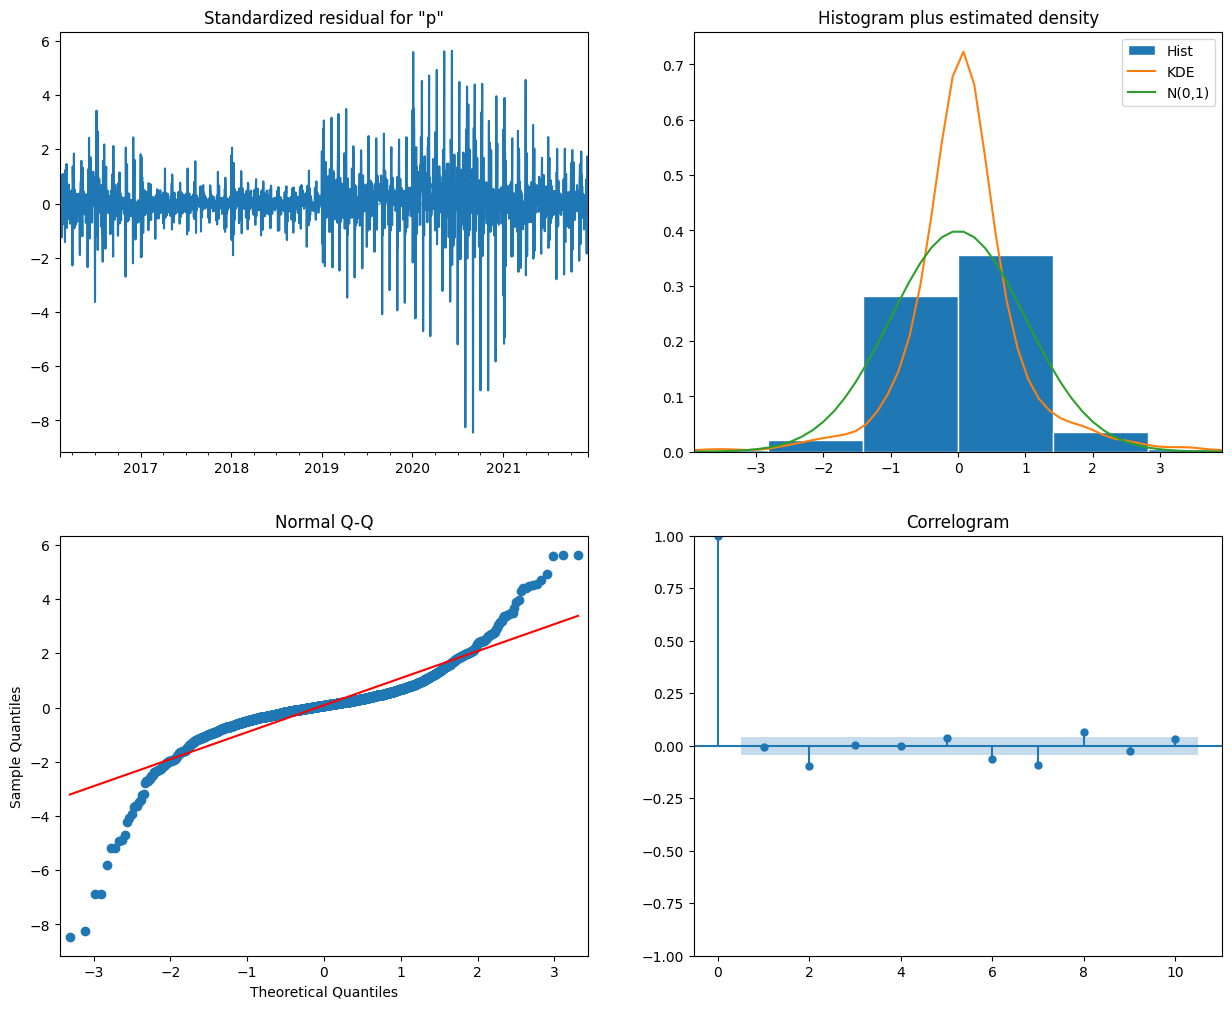

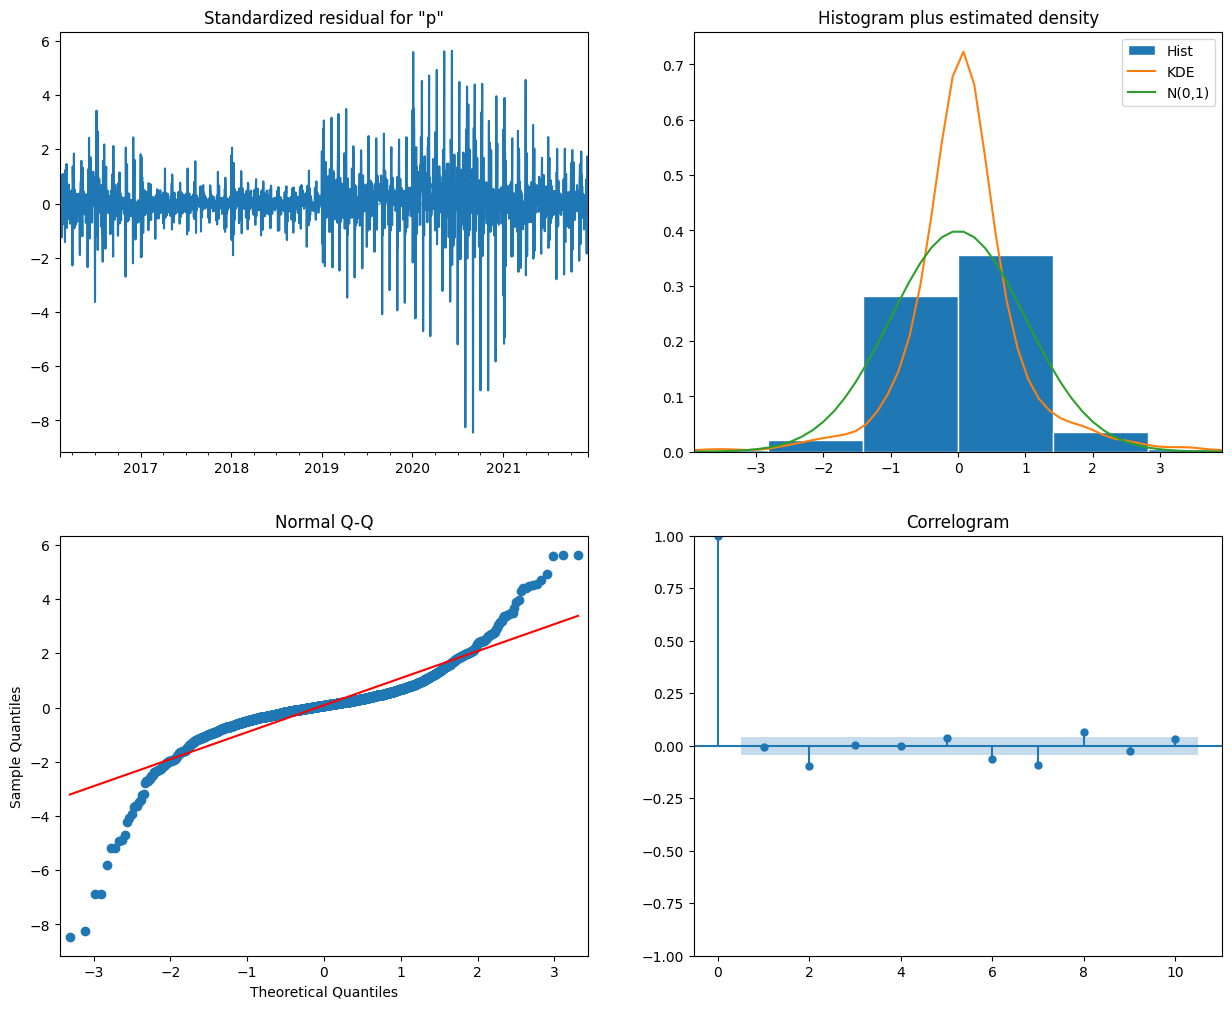

In [32]:
results.plot_diagnostics(figsize=(15, 12))

In [54]:
forecast = results.get_forecast(steps=12)

In [55]:
# Get the forecasted values
forecasted_values = forecast.predicted_mean

In [56]:
# Get the confidence intervals
confidence_intervals = forecast.conf_int()

In [57]:
print(forecasted_values)
print(confidence_intervals)

2021-12-10    4228.292308
2021-12-11    4254.471843
2021-12-12    4271.200410
2021-12-13    4262.577069
2021-12-14    4247.345815
2021-12-15    4234.124481
2021-12-16    4245.415312
2021-12-17    4270.100432
2021-12-18    4280.724237
2021-12-19    4277.968024
2021-12-20    4263.110178
2021-12-21    4253.697341
Freq: D, Name: predicted_mean, dtype: float64
            lower price_smooth  upper price_smooth
2021-12-10         4146.480968         4310.103648
2021-12-11         4086.118042         4422.825643
2021-12-12         4013.765008         4528.635811
2021-12-13         3951.395697         4573.758441
2021-12-14         3899.715297         4594.976333
2021-12-15         3860.364462         4607.884500
2021-12-16         3852.360216         4638.470408
2021-12-17         3862.539333         4677.661532
2021-12-18         3862.128838         4699.319636
2021-12-19         3850.911071         4705.024977
2021-12-20         3829.527099         4696.693256
2021-12-21         3815.059678

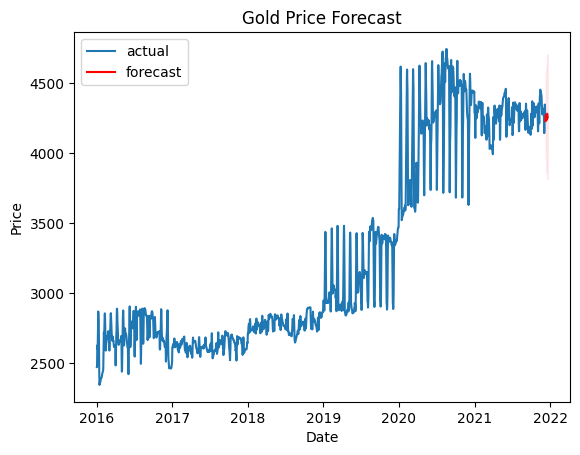

In [58]:
import matplotlib.pyplot as plt

# Plot the actual values
plt.plot(train_data.index, train_data, label='actual')

# Plot the forecasted values
plt.plot(forecasted_values.index, forecasted_values, color='red', label='forecast')

# Plot the confidence intervals
plt.fill_between(confidence_intervals.index,
                 confidence_intervals.iloc[:, 0],
                 confidence_intervals.iloc[:, 1], color='pink', alpha=.3)

plt.title('Gold Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


# Model evaluation

In [ ]:
#MAE

In [59]:
# Calculate Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
mae_sari = mean_absolute_error(test_data,forecasted_values)
print("Mean Absolute Error (MAE):", mae_sari)

Mean Absolute Error (MAE): 94.22976394467453


In [ ]:
#MSE,RMSE

In [60]:
from sklearn.metrics import mean_squared_error
# Calculate Mean Squared Error (MSE)
mse_sari = mean_squared_error(test_data,forecasted_values)

# Calculate Root Mean Squared Error (RMSE)
rmse_sari = np.sqrt(mse_sari)

print("Root Mean Squared Error (RMSE):", rmse_sari)
print(" Mean Squared Error (MSE):", mse_sari)

Root Mean Squared Error (RMSE): 99.44157723345232
 Mean Squared Error (MSE): 9888.627282676664


In [ ]:
#MAPE

In [61]:
# Define a function to calculate MAPE
def mean_absolute_percentage_error(test_data,forecasted_values):
    return np.mean(np.abs((test_data -forecasted_values) /test_data)) * 100

# Calculate MAPE
mape_sari = mean_absolute_percentage_error(test_data,forecasted_values)

# Print the result
print("Mean Absolute Percentage Error (MAPE):", mape_sari)

Mean Absolute Percentage Error (MAPE): 2.158795099851377


In [62]:
# Calculate the accuracy rate of the saima model
accuracy_sari = 100 - (rmse_sari / test_data.mean()) * 100
print('Accuracy rate of the SARIMA model:', accuracy_sari, '%')


Accuracy rate of the SARIMA model: 97.71429032391703 %


# Holt winters 

In [63]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [64]:
model = ExponentialSmoothing(train_data, seasonal='add', seasonal_periods=12)
hw_model = model.fit()

In [65]:
# Forecast the next 30 days
forecast = hw_model.forecast(steps=30)

In [66]:
forecast

2021-12-10    4243.300198
2021-12-11    4239.279965
2021-12-12    4238.738021
2021-12-13    4232.398812
2021-12-14    4227.730977
2021-12-15    4223.411624
2021-12-16    4226.700583
2021-12-17    4226.545543
2021-12-18    4225.430508
2021-12-19    4225.689069
2021-12-20    4232.774924
2021-12-21    4240.460772
2021-12-22    4243.300198
2021-12-23    4239.279965
2021-12-24    4238.738021
2021-12-25    4232.398812
2021-12-26    4227.730977
2021-12-27    4223.411624
2021-12-28    4226.700583
2021-12-29    4226.545543
2021-12-30    4225.430508
2021-12-31    4225.689069
2022-01-01    4232.774924
2022-01-02    4240.460772
2022-01-03    4243.300198
2022-01-04    4239.279965
2022-01-05    4238.738021
2022-01-06    4232.398812
2022-01-07    4227.730977
2022-01-08    4223.411624
Freq: D, dtype: float64

In [ ]:
# while doing model evaluation i am having error that the size of test data is not matching with the forecasted value.
# so i used forecast trimmed.
#The forecast is trimmed to match the length of the test_data.
#forecast_trimmed contains only the forecasted values for the same period as the test data.

In [67]:
forecast_trimmed = forecast[:len(test_data)]

In [68]:
forecast_trimmed

2021-12-10    4243.300198
2021-12-11    4239.279965
2021-12-12    4238.738021
2021-12-13    4232.398812
2021-12-14    4227.730977
2021-12-15    4223.411624
2021-12-16    4226.700583
2021-12-17    4226.545543
2021-12-18    4225.430508
2021-12-19    4225.689069
2021-12-20    4232.774924
2021-12-21    4240.460772
Freq: D, dtype: float64

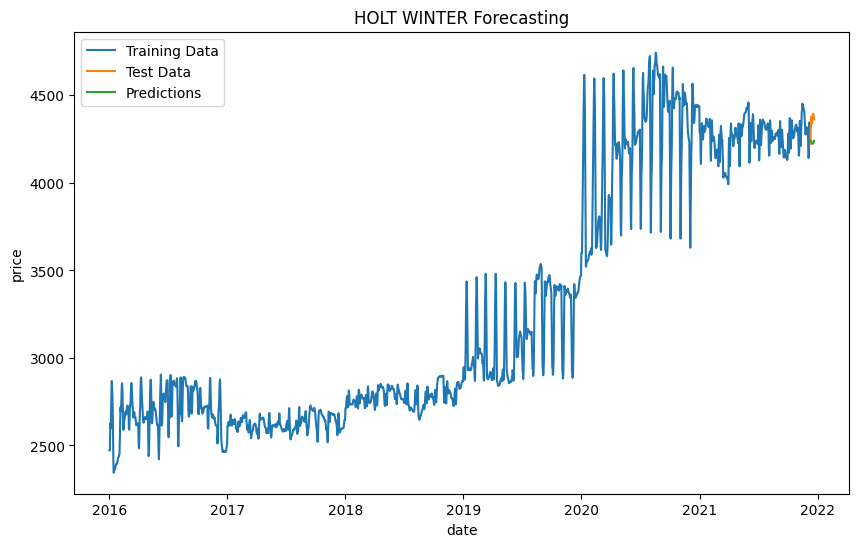

In [69]:
plt.figure(figsize=(10,6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(test_data.index,forecast_trimmed, label='Predictions')
plt.xlabel('date')
plt.ylabel('price')
plt.title('HOLT WINTER Forecasting')
plt.legend()
plt.show()

# Model evaluation

In [ ]:
#MAE

In [70]:
# Calculate Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
mae_holt = mean_absolute_error(test_data, forecast_trimmed)

print("Mean Absolute Error (MAE):", mae_holt)

Mean Absolute Error (MAE): 122.27828346841716


In [ ]:
# MSE,RMSE

In [71]:
# Calculate Mean Squared Error (MSE)
mse_holt = mean_squared_error(test_data, forecast_trimmed)

# Calculate Root Mean Squared Error (RMSE)
rmse_holt = np.sqrt(mse_holt)

print("Root Mean Squared Error (RMSE):", rmse_holt)
print(" Mean Squared Error (MSE):", mse_holt)

Root Mean Squared Error (RMSE): 128.67849982871886
 Mean Squared Error (MSE): 16558.156318169596


In [ ]:
#MAPE

In [72]:
# Define a function to calculate MAPE
def mean_absolute_percentage_error(test_data,forecast_trimmed):
    return np.mean(np.abs((test_data -forecast_trimmed) /test_data)) * 100

# Calculate MAPE
mape_holt = mean_absolute_percentage_error(test_data,forecast_trimmed)

# Print the result
print("Mean Absolute Percentage Error (MAPE):", mape_holt)

Mean Absolute Percentage Error (MAPE): 2.8013894384060642


In [73]:
# Calculate the accuracy rate of the holtswinter model
accuracy_holts = 100 - (rmse_holt / test_data.mean()) * 100
print('Accuracy rate of the HOLT WINTER model:', accuracy_holts, '%')


Accuracy rate of the HOLT WINTER model: 97.0422664206959 %


# ARIMA

import itertools
from statsmodels.tsa.arima.model import ARIMA

# Define range for p, d, and q
p_range = range(0, 6)   
d_range = range(0, 2)
q_range = range(0, 6)

# Generate all possible combinations of p, d, and q
orders = list(itertools.product(p_range, d_range, q_range))

# Assuming you have your training data loaded into a pandas DataFrame named 'train_data'
# train_data = ...

best_aic = float("inf")
best_order = None

# Iterate through each combination and fit ARIMA model
for order in orders:
    try:
        model = ARIMA(train_data, order=order)
        model_fit = model.fit()
        aic = model_fit.aic
        if aic < best_aic:
            best_aic = aic
            best_order = order
    except:
        continue

print("Best ARIMA order:", best_order)
print("Best AIC:", best_aic)

In [74]:
# Fit ARIMA model
model = ARIMA(train_data, order=(4,1,5))  # Example order, you may need to adjust this
model_fit = model.fit()

In [75]:
# Forecast for the next 30 days
forecast = model_fit.forecast(steps=30)

print("Forecast for the next 30 days:")
print(forecast)

Forecast for the next 30 days:
2021-12-10    4230.217108
2021-12-11    4251.156659
2021-12-12    4250.717850
2021-12-13    4239.612031
2021-12-14    4245.442981
2021-12-15    4266.212868
2021-12-16    4283.290690
2021-12-17    4289.026697
2021-12-18    4289.360588
2021-12-19    4290.378739
2021-12-20    4291.902483
2021-12-21    4291.658572
2021-12-22    4289.711983
2021-12-23    4287.801212
2021-12-24    4286.863076
2021-12-25    4286.535110
2021-12-26    4286.271095
2021-12-27    4286.027443
2021-12-28    4285.986076
2021-12-29    4286.147029
2021-12-30    4286.345798
2021-12-31    4286.471981
2022-01-01    4286.537217
2022-01-02    4286.585872
2022-01-03    4286.625072
2022-01-04    4286.640098
2022-01-05    4286.630510
2022-01-06    4286.611981
2022-01-07    4286.597160
2022-01-08    4286.587483
Freq: D, Name: predicted_mean, dtype: float64


In [76]:
ariforecast_trimmed = forecast[:len(test_data)]

In [77]:
ariforecast_trimmed

2021-12-10    4230.217108
2021-12-11    4251.156659
2021-12-12    4250.717850
2021-12-13    4239.612031
2021-12-14    4245.442981
2021-12-15    4266.212868
2021-12-16    4283.290690
2021-12-17    4289.026697
2021-12-18    4289.360588
2021-12-19    4290.378739
2021-12-20    4291.902483
2021-12-21    4291.658572
Freq: D, Name: predicted_mean, dtype: float64

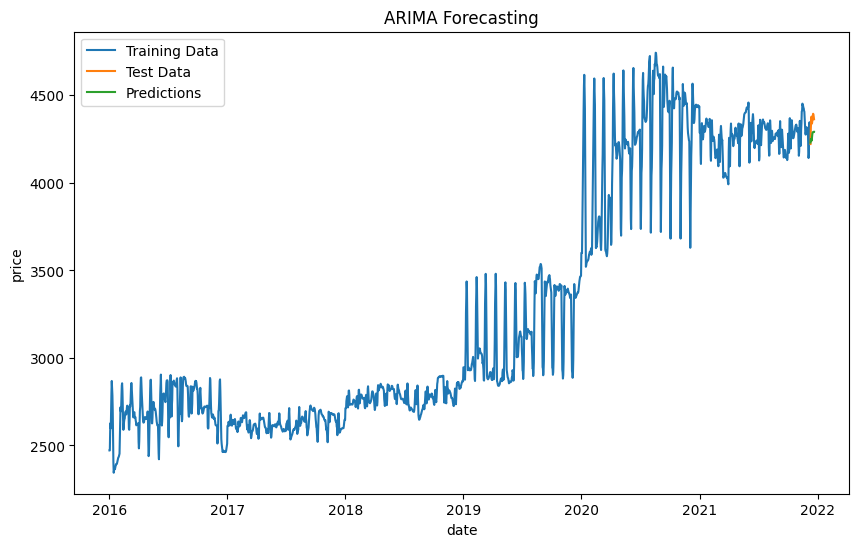

In [78]:
plt.figure(figsize=(10,6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(test_data.index,ariforecast_trimmed, label='Predictions')
plt.xlabel('date')
plt.ylabel('price')
plt.title('ARIMA Forecasting')
plt.legend()
plt.show()

# Model evaluation

In [ ]:
#MAE

In [79]:
# Calculate Mean Absolute Error (MAE)
mae_ari = mean_absolute_error(test_data,ariforecast_trimmed)

print("Mean Absolute Error (MAE):", mae_ari)

Mean Absolute Error (MAE): 83.72141248705036


In [ ]:
#MSE,RMSE

In [80]:
# Calculate Mean Squared Error (MSE)
mse_ari = mean_squared_error(test_data, ariforecast_trimmed)

# Calculate Root Mean Squared Error (RMSE)
rmse_ari = np.sqrt(mse_ari)

print("Root Mean Squared Error (RMSE):", rmse_ari)
print(" Mean Squared Error (MSE):", mse_ari)

Root Mean Squared Error (RMSE): 88.84176556676624
 Mean Squared Error (MSE): 7892.859309020253


In [ ]:
#MAPE

In [81]:
# Define a function to calculate MAPE
def mean_absolute_percentage_error(test_data,ariforecast_trimmed):
    return np.mean(np.abs((test_data -ariforecast_trimmed) /test_data)) * 100

# Calculate MAPE
mape_ari = mean_absolute_percentage_error(test_data,ariforecast_trimmed)

# Print the result
print("Mean Absolute Percentage Error (MAPE):", mape_ari)

Mean Absolute Percentage Error (MAPE): 1.9183958504141188


In [82]:
# Calculate the accuracy rate of the arima model
accuracy_arima = 100 - (rmse_ari/ test_data.mean()) * 100
print('Accuracy rate of the ARIMA model:', accuracy_arima, '%')


Accuracy rate of the ARIMA model: 97.95793179426823 %


In [83]:
Evaluation = {"Models":pd.Series(["SRIMA","HOLT WINTERS","ARIMA"]),
        "MAE":pd.Series([mae_sari,mae_holt,mae_ari]),
        "MSE":pd.Series([mse_sari,mse_holt,mse_ari]),                          
        "RMSE_Values":pd.Series([rmse_sari,rmse_holt,rmse_ari]),
        "MAPE(%)":pd.Series([ mape_sari,mape_holt,mape_ari])}
table_evaluation=pd.DataFrame(Evaluation)
table_evaluation.sort_values(['RMSE_Values'], inplace=True, ignore_index=True)
table_evaluation

,Models,MAE,MSE,RMSE_Values,MAPE(%)
0,ARIMA,83.721412,7892.859309,88.841766,1.918396
1,SRIMA,94.229764,9888.627283,99.441577,2.158795
2,HOLT WINTERS,122.278283,16558.156318,128.678500,2.801389


In [84]:
from pickle import dump

In [85]:
dump(results, open('pred.pkl','wb'))